In [1]:
import numpy as np
import cv2
import os
from pvd_lib import pvd_lib
import matplotlib.pyplot as plt


In [1]:
def DCTEncoding(image_path, message):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return
    
    # Convert message to binary
    message_bin = ''.join(format(ord(char), '08b') for char in message)
    message_bin += '1111111111111110'  # End of Message (EOM) marker

    # Apply DCT
    img_dct = cv2.dct(np.float32(img))

    # Embed message into DCT coefficients
    index = 0
    for i in range(img_dct.shape[0]):
        for j in range(img_dct.shape[1]):
            if index < len(message_bin):
                img_dct[i, j] = img_dct[i, j] + (1 if message_bin[index] == '1' else 0)
                index += 1

    # Apply inverse DCT
    img_encoded = cv2.idct(img_dct)
    img_encoded = np.uint8(img_encoded)

    # Save encoded image
    base_name = os.path.basename(image_path).split('.')[0]
    encoded_folder = "DCT Encoded_Images"
    os.makedirs(encoded_folder, exist_ok=True)
    encoded_path = f"{encoded_folder}/dct_encoded.png"
    cv2.imwrite(encoded_path, img_encoded)

    print(f"Encoded image saved at: {encoded_path}")
    return encoded_path


In [3]:
def DCTDecoding(encoded_image_path):
    # Load the encoded image
    img = cv2.imread(encoded_image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load encoded image {encoded_image_path}")
        return
    
    # Apply DCT
    img_dct = cv2.dct(np.float32(img))

    # Extract message bits
    message_bin = ""
    for i in range(img_dct.shape[0]):
        for j in range(img_dct.shape[1]):
            bit = '1' if img_dct[i, j] % 2 != 0 else '0'
            message_bin += bit
            if message_bin.endswith('1111111111111110'):  # EOM marker
                break
        if message_bin.endswith('1111111111111110'):
            break

    # Convert binary to text
    message_bin = message_bin[:-16]  # Remove EOM marker
    message = ''.join(chr(int(message_bin[i:i+8], 2)) for i in range(0, len(message_bin), 8))

    print(f"Decoded Message: {message}")
    return message

In [4]:
# Encode a message into an image
imag_path = r"images1/112 - Copy.jpg"
Text= "Hello, this is a secret message!"
encoded_image_path = DCTEncoding(imag_path, Text)

# Decode the message from the encoded image
DCTDecoding(encoded_image_path)

Encoded image saved at: DCT Encoded_Images/dct_encoded.png
Decoded Message: ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ

'ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ

In [2]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

def existing_compare_images(original_image_path, encoded_image_path):
    # Load images
    original = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    encoded = cv2.imread(encoded_image_path, cv2.IMREAD_GRAYSCALE)

    if original is None or encoded is None:
        print("Error: Could not load one or both images.")
        return

    # Ensure both images have the same size
    if original.shape != encoded.shape:
        encoded = cv2.resize(encoded, (original.shape[1], original.shape[0]))

    # Compute PSNR, SSIM, and MSE
    psnr_value = psnr(original, encoded)
    ssim_value = ssim(original, encoded)
    mse_value = mse(original, encoded)

    # Print results
    print(f"PSNR: {psnr_value:.2f} dB")
    print(f"SSIM: {ssim_value:.4f}")
    print(f"MSE: {mse_value:.2f}")



In [3]:
encoded_path = "DCT Encoded_Images/dct_encoded.png"

# Compare the images
existing_compare_images(imag_path, encoded_path)

NameError: name 'imag_path' is not defined

In [ ]:
global image_path, text_path

pvd_obj = pvd_lib()

def sliceText(text_file, images_path):
    with open(text_file, "rb") as myfile:
        data = myfile.read()
    myfile.close()
    files = []
    for root, dirs, directory in os.walk(images_path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            if 'Thumbs.db' not in directory[j]:
                files.append(root+"/"+directory[j])

    length = len(data)
    size = int(length / len(files))
    tot_blocks = len(files)
    start = 0
    end = size
    block = []
    for i in range(0, tot_blocks):
        chunk = data[start:end]
        block.append(chunk.decode('latin1'))
        start = end
        end = end + size
    remain =  length - start
    if remain > 0:
        chunk = data[start:length]
        last = block[len(block)-1]
        last += chunk.decode('latin1')
        block[len(block)-1] = last
        print(str(start)+" "+str(length)+" "+str(chunk.decode('latin1')))
    return block, files

In [5]:
def display_encoded_images(encoded_folder):
    """
    Display all encoded images in a grid layout.
    """
    if not os.path.exists(encoded_folder):
        print(f"Folder '{encoded_folder}' does not exist.")
        return

    image_files = [f for f in os.listdir(encoded_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    if not image_files:
        print("No encoded images found.")
        return

    num_images = len(image_files)
    rows = (num_images // 3) + (num_images % 3 > 0)  # Dynamic row calculation for a 3-column grid

    plt.figure(figsize=(15, 5 * rows))

    for i, image_file in enumerate(image_files, 1):
        img = cv2.imread(os.path.join(encoded_folder, image_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

        plt.subplot(rows, 3, i)
        plt.imshow(img)
        plt.title(f"Encoded: {image_file}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [6]:
def MLPDEncoding(image_path, slice_msg):
    base_name = os.path.basename(os.path.dirname(image_path))
    with open("data.txt", "wb") as myfile:
        myfile.write(slice_msg.encode())
    myfile.close()
    if os.path.exists('Encoded_Images/'+base_name) == False:
        os.makedirs('Encoded_Images/'+base_name)
    img_name = os.path.basename(image_path)
    img_name = img_name.replace(".jpg", ".png")
    pvd_obj.pvd_embed(image_path, "data.txt", 'Encoded_Images/'+base_name+"/"+img_name)


In [7]:
def MLPDDecoding(base_name):
    output = ""
    base_name
    files = []
    for root, dirs, directory in os.walk(image_path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            if 'Thumbs.db' not in directory[j]:
                files.append(root+"/"+directory[j])
    for i in range(len(files)):
        img_name = os.path.basename(files[i])
        img_name = img_name.replace(".jpg", ".png")
        print(files[i]+" == "+'Encoded_Images/'+base_name+"/"+os.path.basename(files[i]))
        pvd_obj.pvd_extract(files[i], "data.txt", 'Encoded_Images/'+base_name+"/"+img_name)
        with open("data.txt", "rb") as myfile:
            data = myfile.read()
        myfile.close()
        output += data.decode('latin1')
    return output           

In [8]:
def uploadImages(folder_path):
    global image_path
    image_path = folder_path

    # Get list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    
    if not image_files:
        print("No images found in the folder.")
        return
    
    num_images = min(len(image_files), 6)  # Limit to 6 images for 2x3 grid
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    for idx, img_file in enumerate(image_files[:num_images]):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format for Matplotlib

        row, col = divmod(idx, 3)  # Get row and column index
        axes[row, col].imshow(img)
        axes[row, col].set_title(f"Image {idx+1}")
        axes[row, col].axis('off')

    # Hide empty subplots if images are less than 6
    for idx in range(num_images, 6):
        row, col = divmod(idx, 3)
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

In [9]:
def uploadText_Apply_MLPD(text_path):
    global image_path
    print(f"{text_path} loaded")
    text_path = text_path
    block, files = sliceText(text_path, image_path)  # Assuming sliceText() is defined

    for i in range(len(files)):
        img = cv2.imread(files[i])
        img = cv2.resize(img, (600, 600))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2.imwrite(files[i], img)

        MLPDEncoding(files[i], block[i])  # Assuming PVDEncoding() is defined

        print(f"Slice Message: {block[i]}")
        print(f"Hidden inside: {files[i]}\n")

In [10]:
def ExtractText(encoded_path):
    name = os.path.basename(encoded_path)
    print("extract "+name)
    output = MLPDDecoding(name)
    print("Extracted Text = "+output)

In [11]:
folder_path = r"images1"
uploadImages(folder_path)

NameError: name 'os' is not defined

In [12]:
text_path = r"Input.txt"
uploadText_Apply_MLPD(text_path)

Input.txt loaded


NameError: name 'sliceText' is not defined

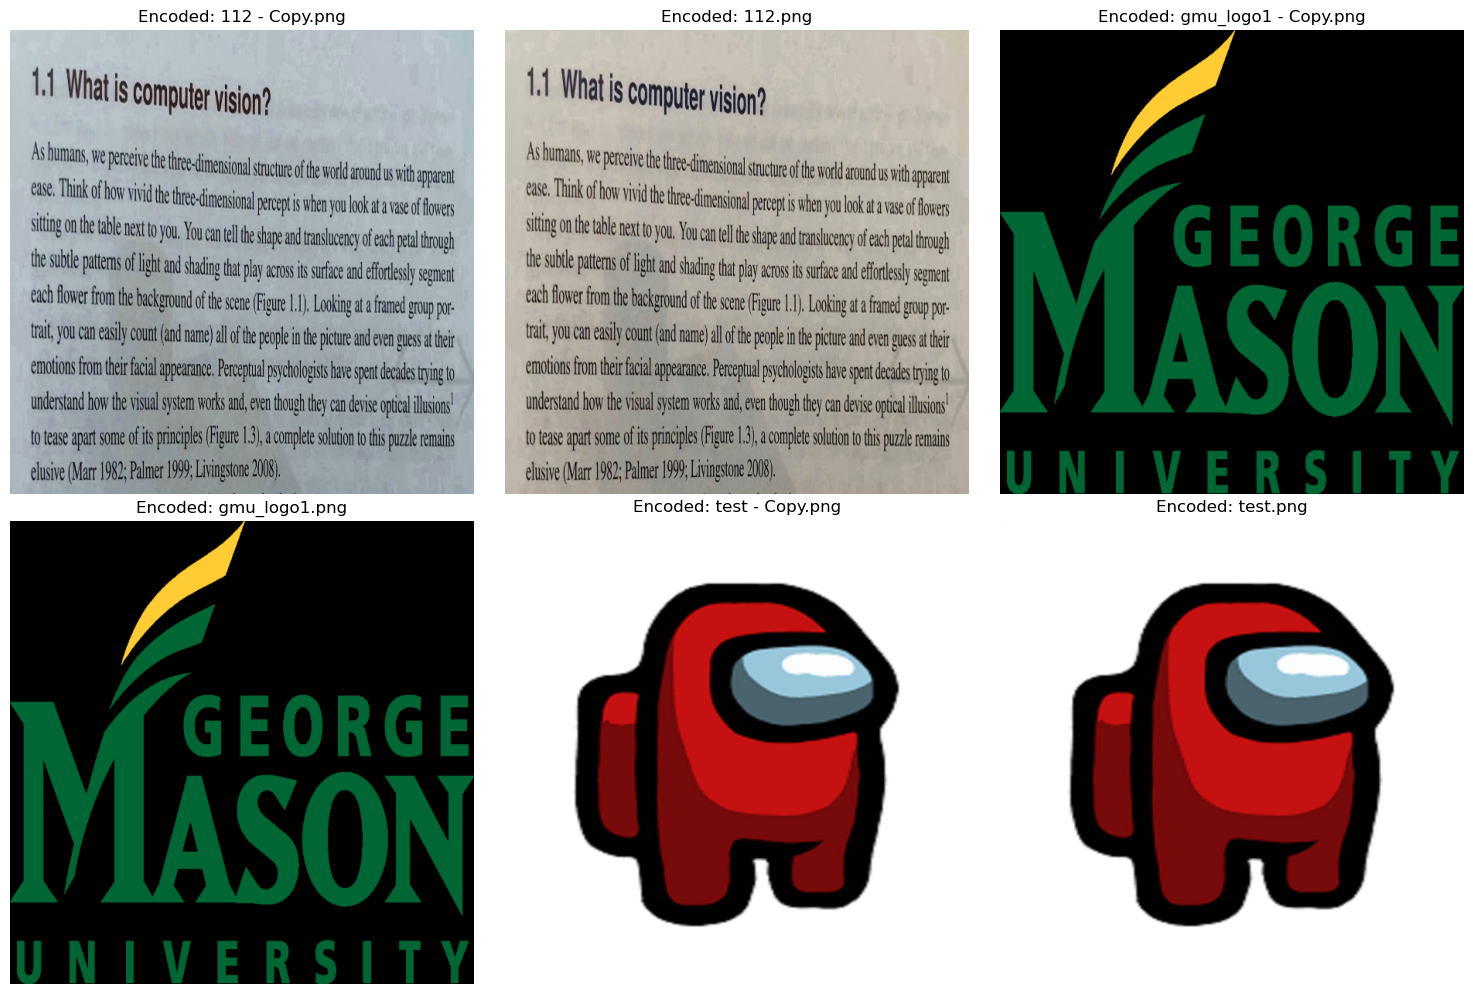

In [16]:
encoded_folder = 'Encoded_Images/'+folder_path
display_encoded_images(encoded_folder)

In [10]:
encoded_path = r"images1"
ExtractText(encoded_path)

NameError: name 'os' is not defined

In [3]:
from skimage.metrics import structural_similarity as ssim

def mse(imageA, imageB):
    """Compute the Mean Squared Error (MSE) between two images."""
    err = np.mean((imageA.astype("float") - imageB.astype("float")) ** 2)
    return err

def psnr(imageA, imageB):
    """Compute the Peak Signal-to-Noise Ratio (PSNR) between two images."""
    mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return 100  # Maximum PSNR when images are identical
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def compare_images(folder_path, encoded_folder):
    """
    Compare original images with encoded versions using PSNR, SSIM, and MSE.
    """
    if not os.path.exists(folder_path) or not os.path.exists(encoded_folder):
        print("One of the directories does not exist.")
        return

    original_images = sorted([f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
    encoded_images = sorted([f for f in os.listdir(encoded_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

    if not original_images or not encoded_images:
        print("No images found in one of the folders.")
        return

    psnr_values, ssim_values, mse_values = [], [], []

    plt.figure(figsize=(12, len(original_images) * 3))

    for i, img_name in enumerate(original_images):
        orig_path = os.path.join(folder_path, img_name)
        enc_path = os.path.join(encoded_folder, img_name.replace(".jpg", ".png"))  # Ensure correct extension mapping

        if not os.path.exists(enc_path):
            print(f"Encoded version of {img_name} not found.")
            continue

        # Load images
        orig_img = cv2.imread(orig_path)
        enc_img = cv2.imread(enc_path)

        # Convert to grayscale for SSIM comparison
        orig_gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
        enc_gray = cv2.cvtColor(enc_img, cv2.COLOR_BGR2GRAY)

        # Calculate metrics
        mse_val = mse(orig_gray, enc_gray)
        psnr_val = psnr(orig_gray, enc_gray)
        ssim_val = ssim(orig_gray, enc_gray)

        mse_values.append(mse_val)
        psnr_values.append(psnr_val)
        ssim_values.append(ssim_val)

        # Display images
        plt.subplot(len(original_images), 3, i * 3 + 1)
        plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Original: {img_name}")
        plt.axis('off')

        plt.subplot(len(original_images), 3, i * 3 + 2)
        plt.imshow(cv2.cvtColor(enc_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Encoded: {img_name}")
        plt.axis('off')

        plt.subplot(len(original_images), 3, i * 3 + 3)
        plt.bar(['PSNR', 'SSIM', 'MSE'], [psnr_val, ssim_val, mse_val], color=['blue', 'green', 'red'])
        plt.ylim(0, max(100, max(mse_values)))  # Scale the graph properly
        plt.title(f"Metrics for {img_name}")

    plt.tight_layout()
    plt.show()

    # Print summary results
    print("\nSummary Results:")
    for i, img_name in enumerate(original_images):
        print(f"{img_name} -> PSNR: {psnr_values[i]:.2f}, SSIM: {ssim_values[i]:.4f}, MSE: {mse_values[i]:.2f}")


In [13]:
compare_images(folder_path, encoded_folder)


NameError: name 'encoded_folder' is not defined